In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_excel(r'C:\Users\SANIKA\Documents\Data_Train_Restaurant.xlsx')
test = pd.read_excel(r'C:\Users\SANIKA\Documents\Data_Test_Restaurant.xlsx')

In [3]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [5]:
train.shape,test.shape

((12690, 9), (4231, 8))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [8]:
train.nunique()

TITLE              113
RESTAURANT_ID    11892
CUISINES          4155
TIME              2689
CITY               359
LOCALITY          1416
RATING              32
VOTES             1847
COST                86
dtype: int64

In [9]:
test.nunique()

TITLE              86
RESTAURANT_ID    4127
CUISINES         1727
TIME             1183
CITY              151
LOCALITY          834
RATING             31
VOTES            1136
dtype: int64

In [10]:
train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [11]:
test.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [12]:
train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [13]:
test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

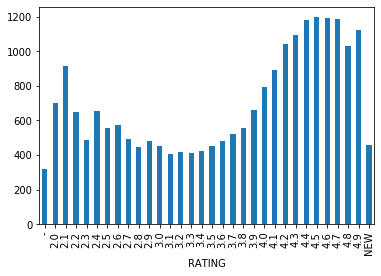

In [14]:
train.groupby(['RATING'])['COST'].mean().plot(kind='bar')

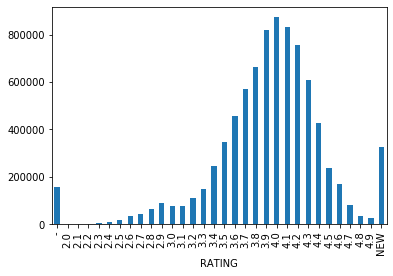

In [15]:
train.groupby(['RATING'])['COST'].sum().plot(kind='bar')

In [16]:
train['TIME'] = train['TIME'].str.replace(r'Closed \(.*?\)','')

In [17]:
train['RATING'] =train['RATING'].str.replace('NEW', '1')
train['RATING'] = train['RATING'].str.replace('-', '1').astype(float)

In [18]:
train['VOTES'] = train['VOTES'].str.replace(' votes', '').astype(float)

In [19]:
train['CITY'].fillna('Missing', inplace=True)  
train['LOCALITY'].fillna('Missing', inplace=True)  
train['RATING'].fillna(3.8, inplace=True)  
train['VOTES'].fillna(0, inplace=True)

In [20]:
train['COST'] =train['COST'].astype(float)

In [21]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0


In [22]:
train['TITLE'].nunique(), train['CUISINES'].nunique()

(113, 4155)

In [23]:
train['title_rat'] = train['TITLE'].map(train.groupby('TITLE')['RATING'].mean())
train['title_rat_C'] = train['TITLE'].map(train.groupby('TITLE')['RATING'].count())
train['city_rat'] = train['CITY'].map(train.groupby('CITY')['RATING'].mean())
train['city_rat_C'] = train['CITY'].map(train.groupby('CITY')['RATING'].count())
train['cuisine_rat'] = train['CUISINES'].map(train.groupby('CUISINES')['RATING'].mean())
train['cuisine_rat_C'] = train['CUISINES'].map(train.groupby('CUISINES')['RATING'].count())

In [24]:
train['rest_id'] = train['RESTAURANT_ID'].map(train.groupby('RESTAURANT_ID')['RATING'].count())

In [25]:
train['title_rat_sum'] =train['TITLE'].map(train.groupby('TITLE')['RATING'].sum())
train['title_rat_C_sum'] = train['TITLE'].map(train.groupby('TITLE')['RATING'].sum())
train['city_rat_sum'] = train['CITY'].map(train.groupby('CITY')['RATING'].sum())
train['city_rat_C_sum'] = train['CITY'].map(train.groupby('CITY')['RATING'].sum())
train['cuisine_rat_sum'] = train['CUISINES'].map(train.groupby('CUISINES')['RATING'].sum())
train['cuisine_rat_C_sum'] = train['CUISINES'].map(train.groupby('CUISINES')['RATING'].sum())

In [26]:
train.dtypes

TITLE                 object
RESTAURANT_ID          int64
CUISINES              object
TIME                  object
CITY                  object
LOCALITY              object
RATING               float64
VOTES                float64
COST                 float64
title_rat            float64
title_rat_C            int64
city_rat             float64
city_rat_C             int64
cuisine_rat          float64
cuisine_rat_C          int64
rest_id                int64
title_rat_sum        float64
title_rat_C_sum      float64
city_rat_sum         float64
city_rat_C_sum       float64
cuisine_rat_sum      float64
cuisine_rat_C_sum    float64
dtype: object

In [27]:
test['TIME'] =test['TIME'].str.replace(r'Closed \(.*?\)','')

In [28]:
test['RATING'] =test['RATING'].str.replace('NEW', '1')
test['RATING'] = test['RATING'].str.replace('-', '1').astype(float)

In [29]:
test['VOTES'] = test['VOTES'].str.replace(' votes', '').astype(float)

In [30]:
test['CITY'].fillna('Missing', inplace=True)  
test['LOCALITY'].fillna('Missing', inplace=True)  
test['RATING'].fillna(3.8, inplace=True)  
test['VOTES'].fillna(0, inplace=True)

In [31]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564.0
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61.0
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350.0
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445.0
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23.0


In [32]:
test['title_rat'] = test['TITLE'].map(test.groupby('TITLE')['RATING'].mean())
test['title_rat_C'] = test['TITLE'].map(test.groupby('TITLE')['RATING'].count())
test['city_rat'] = test['CITY'].map(test.groupby('CITY')['RATING'].mean())
test['city_rat_C'] = test['CITY'].map(test.groupby('CITY')['RATING'].count())
test['cuisine_rat'] = test['CUISINES'].map(test.groupby('CUISINES')['RATING'].mean())
test['cuisine_rat_C'] = test['CUISINES'].map(test.groupby('CUISINES')['RATING'].count())

In [33]:
test['rest_id'] = test['RESTAURANT_ID'].map(test.groupby('RESTAURANT_ID')['RATING'].count())

In [34]:
test['title_rat_sum'] =test['TITLE'].map(test.groupby('TITLE')['RATING'].sum())
test['title_rat_C_sum'] = test['TITLE'].map(test.groupby('TITLE')['RATING'].sum())
test['city_rat_sum'] = test['CITY'].map(test.groupby('CITY')['RATING'].sum())
test['city_rat_C_sum'] = test['CITY'].map(test.groupby('CITY')['RATING'].sum())
test['cuisine_rat_sum'] = test['CUISINES'].map(test.groupby('CUISINES')['RATING'].sum())
test['cuisine_rat_C_sum'] = test['CUISINES'].map(test.groupby('CUISINES')['RATING'].sum())

In [35]:
test.dtypes

TITLE                 object
RESTAURANT_ID          int64
CUISINES              object
TIME                  object
CITY                  object
LOCALITY              object
RATING               float64
VOTES                float64
title_rat            float64
title_rat_C            int64
city_rat             float64
city_rat_C             int64
cuisine_rat          float64
cuisine_rat_C          int64
rest_id                int64
title_rat_sum        float64
title_rat_C_sum      float64
city_rat_sum         float64
city_rat_C_sum       float64
cuisine_rat_sum      float64
cuisine_rat_C_sum    float64
dtype: object

In [36]:
y = train.iloc[:, 1]

In [37]:
x= train.iloc[:,train.columns!='COST'].values

In [38]:
from sklearn.preprocessing import OrdinalEncoder
# Encoding
enc = OrdinalEncoder()
x= enc.fit_transform(x)

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x =sc.fit_transform(x)

In [40]:
x

array([[-0.86888688,  0.36693474,  0.32540837, ..., -0.54030454,
        -1.35190851, -1.35190851],
       [-0.80783894,  1.20653238, -1.61638078, ...,  0.36203455,
        -1.31659067, -1.31659067],
       [-0.86888688,  0.70318207,  0.61526483, ...,  0.36203455,
        -1.08702469, -1.08702469],
       ...,
       [ 0.35207201,  0.75246724, -0.12224961, ..., -0.29421206,
        -1.32836328, -1.32836328],
       [-0.86888688, -0.35571999,  1.055448  , ...,  0.36203455,
        -0.31591844, -0.31591844],
       [-0.86888688, -0.2906869 ,  0.59034881, ...,  0.28000372,
         1.02615962,  1.02615962]])

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import linear_model
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2_score corresponding to random state:',r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state

    print('max r2 score corresponding to',final_r_state,'is:',max_r_score)
    return final_r_state

In [63]:
#lets use Linear Regression and check max_r2_score
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2_score corresponding to random state: 42 is 0.9999882526085969
r2_score corresponding to random state: 43 is 0.999987483413577
r2_score corresponding to random state: 44 is 0.9999879650315089
r2_score corresponding to random state: 45 is 0.9999875645023
r2_score corresponding to random state: 46 is 0.9999877233492194
r2_score corresponding to random state: 47 is 0.9999879458309275
r2_score corresponding to random state: 48 is 0.9999878632470783
r2_score corresponding to random state: 49 is 0.9999879472729146
r2_score corresponding to random state: 50 is 0.9999877758291866
r2_score corresponding to random state: 51 is 0.9999875539532294
r2_score corresponding to random state: 52 is 0.9999889977809909
r2_score corresponding to random state: 53 is 0.9999879072382388
r2_score corresponding to random state: 54 is 0.9999887488680862
r2_score corresponding to random state: 55 is 0.999987789445673
r2_score corresponding to random state: 56 is 0.9999884807621487
r2_score corresponding to rand

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 8}

In [65]:
#lets use KNN regression and check max r2 score
knr=KNeighborsRegressor(n_neighbors=8)
r_state=maxr2_score(knr,x,y)

r2_score corresponding to random state: 42 is 0.8722490034158319
r2_score corresponding to random state: 43 is 0.865281394748228
r2_score corresponding to random state: 44 is 0.8670884949819836
r2_score corresponding to random state: 45 is 0.8716691475376338
r2_score corresponding to random state: 46 is 0.8590902895635876
r2_score corresponding to random state: 47 is 0.8639880914142719
r2_score corresponding to random state: 48 is 0.870644043548083
r2_score corresponding to random state: 49 is 0.8706032176568378
r2_score corresponding to random state: 50 is 0.8643217200326
r2_score corresponding to random state: 51 is 0.8659429383422661
r2_score corresponding to random state: 52 is 0.8687457071862064
r2_score corresponding to random state: 53 is 0.8663092454494075
r2_score corresponding to random state: 54 is 0.8680068668882408
r2_score corresponding to random state: 55 is 0.8666823984206689
r2_score corresponding to random state: 56 is 0.862079151901607
r2_score corresponding to rando

In [66]:
from sklearn.model_selection import cross_val_score
print('Mean r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for Linear Regression: ',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print()
print('Mean r2 score for KNN Regression:',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for KNeighborsRegressor: ',cross_val_score(knr,x,y,cv=5,scoring='r2').std())
print()

Mean r2 score for Linear Regression: 0.9999878570725181
standard deviation in r2 score for Linear Regression:  2.7023299610610546e-07

Mean r2 score for KNN Regression: 0.8664727470042175
standard deviation in r2 score for KNeighborsRegressor:  0.004530952106269918



In [67]:
#lets check lasso regression & find alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.1}

In [68]:
#lets check max_r2_score with alpha=0.1
lsreg=Lasso(alpha=0.1)
r_state=maxr2_score(lsreg,x,y)

r2_score corresponding to random state: 42 is 0.9999882770657034
r2_score corresponding to random state: 43 is 0.9999875027840227
r2_score corresponding to random state: 44 is 0.99998798221855
r2_score corresponding to random state: 45 is 0.9999875644775077
r2_score corresponding to random state: 46 is 0.9999877471247434
r2_score corresponding to random state: 47 is 0.9999879627564969
r2_score corresponding to random state: 48 is 0.9999878842009546
r2_score corresponding to random state: 49 is 0.9999879552425879
r2_score corresponding to random state: 50 is 0.9999878086582108
r2_score corresponding to random state: 51 is 0.9999875616935218
r2_score corresponding to random state: 52 is 0.9999890171251907
r2_score corresponding to random state: 53 is 0.999987933116249
r2_score corresponding to random state: 54 is 0.9999887745731733
r2_score corresponding to random state: 55 is 0.9999877866231182
r2_score corresponding to random state: 56 is 0.9999884898823379
r2_score corresponding to ra

In [69]:
print('Mean r2 score for Lasso Regression:',cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for Lasso Regression: ',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())
print()

Mean r2 score for Lasso Regression: 0.9999878740561238
standard deviation in r2 score for Lasso Regression:  2.703977444250298e-07



In [70]:
#Now we will try to boost 
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [71]:
gbr=GradientBoostingRegressor(learning_rate=0.01 ,n_estimators=1000 )
print('Mean r2 score for GradientBoostingRegressor:',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for GradientBoostingRegressor: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())
print()

Mean r2 score for GradientBoostingRegressor: 0.9999993155937318
standard deviation in r2 score for GradientBoostingRegressor:  2.0836379408779742e-08



In [ ]:
#We tried all the models and till now the best is  GradientBoostingRegressor
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =47 ,test_size = 0.20)
gbr=GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_pred=gbr.predict(x_test)

In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score is:',r2_score(y_test, y_pred))

I choose DecisionTreeRegressor as my final model because it performed very well on dataset

In [61]:
from sklearn.externals import joblib
#save the model 
joblib.dump(DT, 'Project14.obj')

['Project14.obj']